In [1]:
import MLPlibrary
import keras
import json
import os

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import initializers
from keras import backend as K
from keras.optimizers import Adagrad
from keras.models import load_model

from matplotlib import pyplot as plt

from numpy import argmax

import numpy as np
np.set_printoptions(suppress=True)

Using TensorFlow backend.


In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)

train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)

In [22]:
report_configuration = {}
score = []
dropout = []
ruidos = []
os.chdir('C:/Users/flavi/Desktop/MLP/files/2/')
with open('report_configuration.json', 'r') as f:
    report_configuration = json.load(f)
f.close()

with open('score.json', 'r') as f:
    score = json.load(f)
f.close()


ruidos = report_configuration['ruidos']
dropout = report_configuration['dropout']

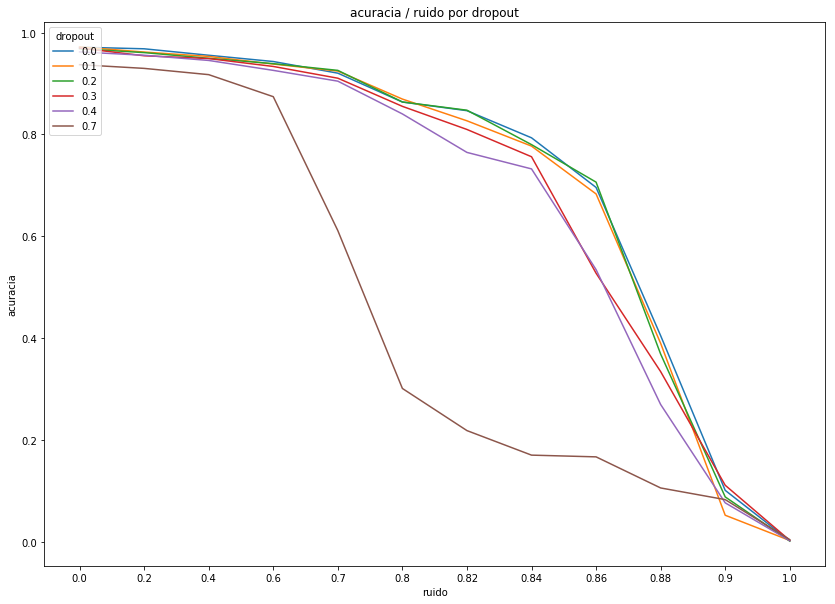

In [21]:
#Para treino com 5 épocas
plt.figure(figsize=(14,10))

for di, d in enumerate(dropout):
    xi = [i for i in range(0, len(ruidos))]
    plt.plot(xi, score[di])

plt.xticks(xi, ruidos)

plt.title('acuracia / ruido por dropout')
plt.ylabel('acuracia')
plt.xlabel('ruido')
plt.legend(dropout, loc='upper left', title="dropout")

plt.show()

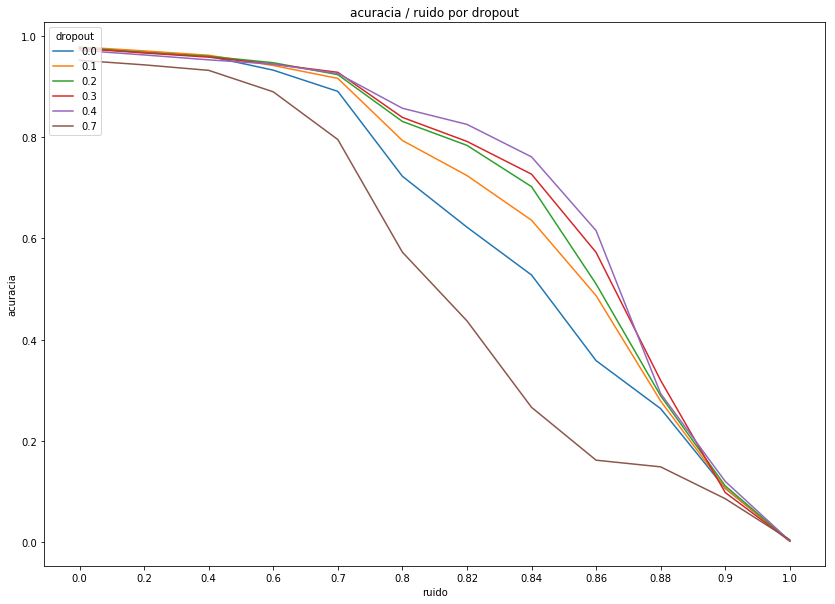

In [23]:
#Para treino com 20 épocas
plt.figure(figsize=(14,10))

for di, d in enumerate(dropout):
    xi = [i for i in range(0, len(ruidos))]
    plt.plot(xi, score[di])

plt.xticks(xi, ruidos)

plt.title('acuracia / ruido por dropout')
plt.ylabel('acuracia')
plt.xlabel('ruido')
plt.legend(dropout, loc='upper left', title="dropout")

plt.show()

In [3]:
#RECUPERA MODELOS SALVOS EM ARQUIVO
report_configuration = {}
with open('report_configuration.json', 'r') as f:
    report_configuration = json.load(f)
f.close()

ruidos = report_configuration['ruidos']
dropout = report_configuration['dropout']
models = []
history = []

for di, d in enumerate(dropout):
    models.append([])
    history.append([])
    for ri, r in enumerate(ruidos):
        try:
            model = load_model('model_noise_' + str(ri) + '_dropout_' + str(d) + '.h5')
            model.load_weights('model_noise_' + str(ri) + '_dropout_' + str(d) + '.h5')
            with open('history_' + str(ri) + '_dropout_' + str(d) + '.json', 'r') as f:
                history[di].append(json.load(f))
        except OSError:
            break
        models[di].append(model)
        i = i + 1

In [ ]:
#Avaliar modelo
pred_y = []
true_y = []
dropout_index = 0
model_index = 0
correto = 0
incorreto = 0

for i in range(len(test_x)):
    predicted = models[dropout_index][model_index].predict_classes(test_x[i].reshape(1, 784))
    pred_y.append(predicted[0])

for i in test_y:
    true_y.append(argmax(i))

for i in range(len(test_y)):
    if true_y[i] == pred_y[i]:
        correto = correto + 1
    else:
        incorreto = incorreto + 1
print('Correto:', correto, '\nIncorreto:', incorreto, '\nAcurácia:', correto / (correto + incorreto))

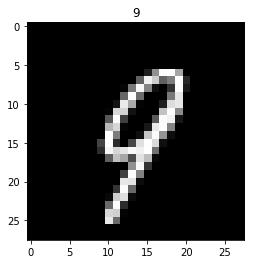

In [24]:
index = 22 #Instância a ser prevista
model_index = 0 #Modelo a ser usado
img = train_x[index]
classname = models[model_index].predict_classes(train_x[index].reshape(1, 784))[0]
plt.imshow(img.reshape(28, 28))
plt.title(classname)
plt.gray()
plt.show()

In [26]:
def plot_loss(history, titulo='loss/epoch'):
    plt.figure(figsize=(12,8))
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(titulo)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
plot_loss(history[0])